In [174]:
import pandas as pd

# Cargamos el archivo .pkl
df = pd.read_pickle('D:\\HENRY REPO\\Proyecto Final\\YELP\\business.pkl')

# Verificamos el contenido
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# Tamaño de Dataset

df.shape 

(150346, 28)

In [176]:
# Observacion de los tipos de datos del dataset y mas informacion

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

In [177]:
# Verificamos si existen valores nulos

df.isnull().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

In [178]:
# Por la cantidad de nulos deducimos que existen columnas duplicadas, asi que procederemos a eliminarlas

df=df.iloc[:, :14]

In [179]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [180]:
# Llenamos los datos faltantes

df.attributes.fillna('{}', inplace=True)
df.categories.fillna('not classified', inplace=True)
df.state.fillna('not classified', inplace=True)
df.hours.fillna('{}', inplace=True)

In [181]:
# Observaremos si tambien existen filas duplicadas 

df[df.iloc[:, :11].duplicated() == True] 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


Crearemos una nueva columna dividiendo las categorias en solo 2 grupos, las que son restaurantes y las que pertenecen a otra categoria

In [182]:
# La funcion crea una nueva lista de las empresas que pertenecen a la categoria Restaurants o si pertenece a algun otra

import re

lista_nueva=[]

def sacarest(text)-> str:

    """La funcion crea una nueva lista de las empresas que pertenecen a la categoria Restaurants o si pertenece a algun otra
    
    argumentos:
    
        text: texto"""
    
    patron = r'\b\w*restaura.\w*\b'
    if re.findall(patron, text, re.IGNORECASE):
        lista_nueva.append('Restaurants')
        
    
    else:
        lista_nueva.append('Others')
    
for i in df['categories']: # Aplicamos la funcion en cada fila de la columna categories
    sacarest(i)

In [183]:
# insertamos la columna is_restaurant con la nueva lista

df.insert(11, column='is_restaurant', value=lista_nueva)

In [184]:
# Transformaremos los indices de cada estado en su nombre completo

import pandas as pd

def convert_state_abbr(column):
    state_names = {
        'PA': 'Pennsylvania', 'FL': 'Florida', 'TN': 'Tennessee', 'IN': 'Indiana',
        'MO': 'Missouri', 'LA': 'Louisiana', 'AZ': 'Arizona', 'NJ': 'New Jersey',
        'NV': 'Nevada', 'AB': 'Alberta', 'CA': 'California', 'ID': 'Idaho',
        'DE': 'Delaware', 'IL': 'Illinois', 'TX': 'Texas', 'CO': 'Colorado',
        'WA': 'Washington', 'HI': 'Hawaii', 'MA': 'Massachusetts', 'NC': 'North Carolina',
        'UT': 'Utah', 'MT': 'Montana', 'MI': 'Michigan', 'SD': 'South Dakota',
        'XMS': 'Unknown', 'VI': 'Virgin Islands', 'VT': 'Vermont'
    }
    return column.map(lambda x: state_names.get(x, 'Unknown'))


# Aplicar la función a la columna
df['State Full Name'] = convert_state_abbr(df['state']) # Aplicamos la funcion



In [185]:
df_Restaurants = df[df.is_restaurant=='Restaurants']

### VISULIZACION DE LOS DATOS

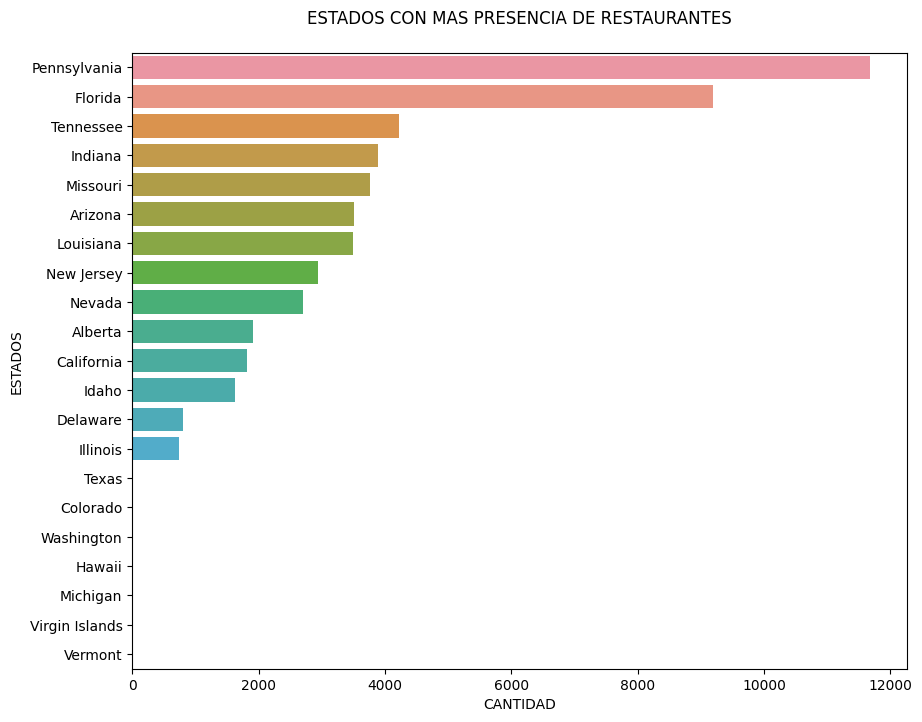

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
sns.barplot(data=df_Restaurants, x = df_Restaurants['State Full Name'].value_counts().values, y =df_Restaurants['State Full Name'].value_counts().index)
plt.title('ESTADOS CON MAS PRESENCIA DE RESTAURANTES\n')
plt.xlabel('CANTIDAD')
plt.ylabel('ESTADOS')
plt.show()